# Term Deposit Marketing

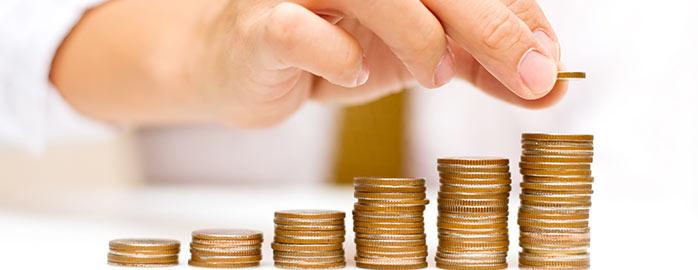

In [81]:
from IPython.display import Image
Image("C:/Users/azsad/OneDrive/Masaüstü/pic2.jpg")

### Data Description

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

### Data Definition

***Age:***  age of customer

***Job:*** type of job 

***Marital:*** marital status 

***Education*** 

***Default:*** has credit in default? 

***Balance:*** average yearly balance, in euros

***Housing:*** has a housing loan? 

***Loan:*** has personal loan? 

***Contact:*** contact communication type

***Day:*** last contact day of the month 

***Month:*** last contact month of year 

***Duration:*** last contact duration, in seconds

***Campaign:*** number of contacts performed during this campaign and for this client (includes last contact)

Output (desired target):

***y -***  has the client subscribed to a term deposit? 

### Scope: 

Predict if the customer will subscribe (yes/no) to a term deposit. (y)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

Using TensorFlow backend.


### Import Data

In [3]:
df = pd.read_csv("C:/Users/azsad/OneDrive/Masaüstü/HangiKredi/term-deposit-marketing-2020.csv",sep=",",low_memory=False,encoding='utf-8')

In [4]:
df.shape

(40000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


There is no missing value in the dataset.

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [7]:
df["y"].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

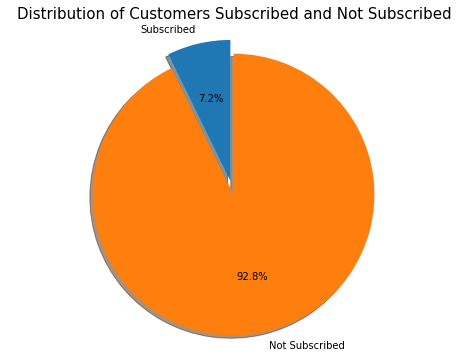

In [8]:
labels = 'Subscribed', 'Not Subscribed'
sizes = [df.y[df['y']=="yes"].count(), df.y[df['y']=="no"].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Distribution of Customers Subscribed and Not Subscribed", size = 15)
plt.show()

In [9]:
df["y"].replace(to_replace="yes", value=1, inplace=True)
df["y"].replace(to_replace="no", value=0, inplace=True)

### EDA

In [10]:
# Get unique count for each variable
df.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

It seems that there is no identification features as ID.

##### Numerical Features

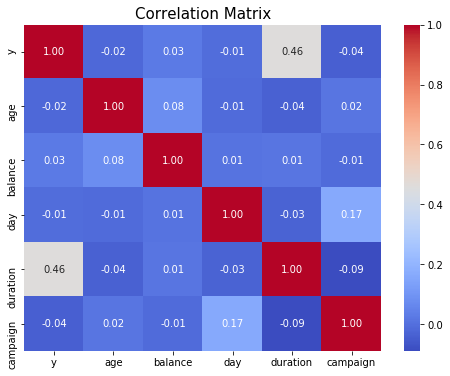

In [11]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [8,6])
g = sns.heatmap(df[["y","age","balance","day","duration","campaign"]].corr(),annot=True, fmt = ".2f", ax=ax, cmap = "coolwarm")
ax.set_title("Correlation Matrix", fontsize=15)
plt.show()

It seems that there is no significance correlation between y (Target Variable) and the other numerical features according to the matrix. To determine this, let's explore in detail these features.

###### Age vs y:

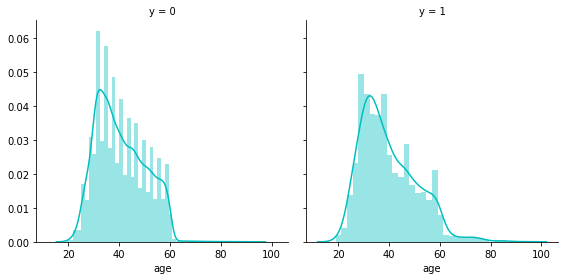

In [12]:
g = sns.FacetGrid(df, col='y', height=4)
g = g.map(sns.distplot, "age", color="c")

We can note that age distributions are different in the y=0 and y=1 subpopulations.

There is a peak corresponding to the young customers, that subscribe to a term deposit. It also seems that passengers more than 60 of the age subscribe less to a term deposit. 

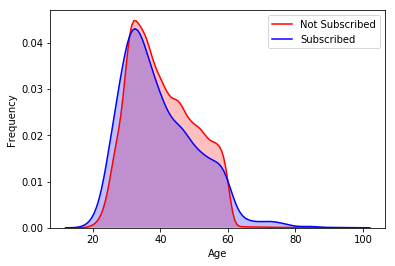

In [13]:
# Explore Age Distibution
g = sns.kdeplot(df["age"][(df["y"] == 0) & (df["age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["age"][(df["y"] == 1) & (df["age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Subscribed","Subscribed"])

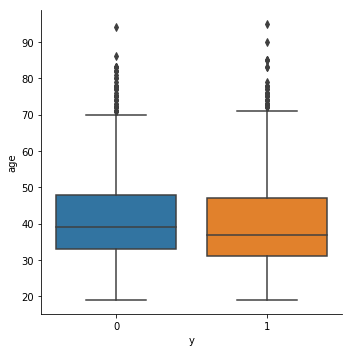

In [14]:
g = sns.catplot(x="y", y = "age",data = df, kind="box")

###### Balance vs y:

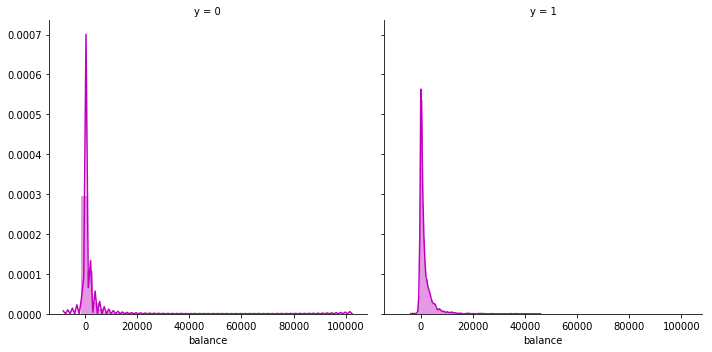

In [15]:
g = sns.FacetGrid(df, col='y', height=5)
g = g.map(sns.distplot, "balance", color="m")

###### Duration vs y:

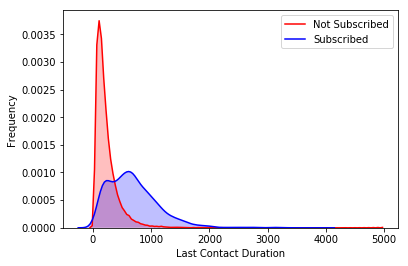

In [16]:
g = sns.kdeplot(df["duration"][(df["y"] == 0) & (df["duration"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["duration"][(df["y"] == 1) & (df["duration"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Last Contact Duration")
g.set_ylabel("Frequency")
g = g.legend(["Not Subscribed","Subscribed"])

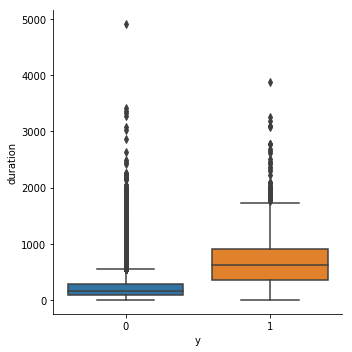

In [17]:
g = sns.catplot(x="y", y = "duration",data = df, kind="box")

##### Campaign vs y:

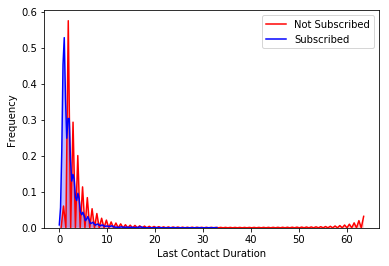

In [18]:
g = sns.kdeplot(df["campaign"][(df["y"] == 0) & (df["campaign"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["campaign"][(df["y"] == 1) & (df["campaign"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Last Contact Duration")
g.set_ylabel("Frequency")
g = g.legend(["Not Subscribed","Subscribed"])

We can notice that  increasing the number of contacts performed during this campaign causes a negative customer experience.

##### Day vs y:

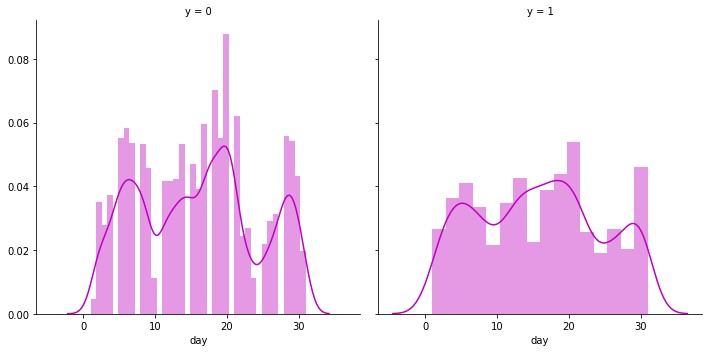

In [19]:
g = sns.FacetGrid(df, col='y', height=5)
g = g.map(sns.distplot, "day", color="m")

##### Categorical Features

##### Job vs y:

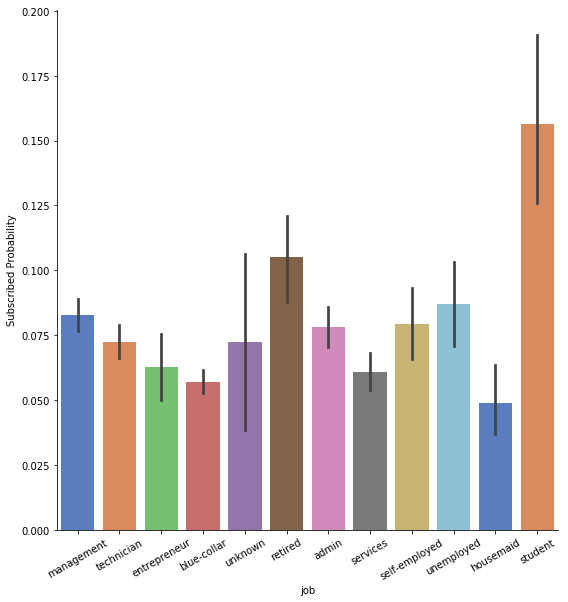

In [20]:
g = sns.catplot(x="job",y="y", data=df, kind="bar", height = 8 ,palette = "muted")
g = g.set_ylabels("Subscribed Probability")

g.set_xticklabels(rotation=30)

##### Marital vs y:

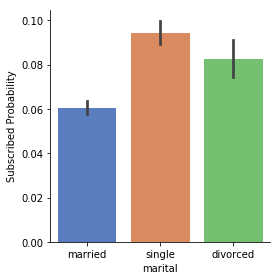

In [21]:
g = sns.catplot(x="marital",y="y", data=df, kind="bar", height = 4 ,palette = "muted")
g = g.set_ylabels("Subscribed Probability")

##### Education v y:

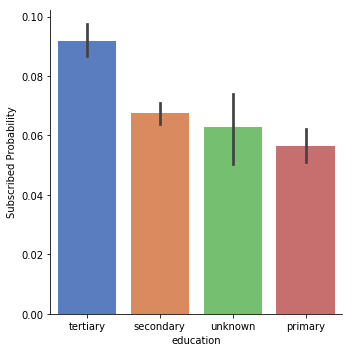

In [22]:
g = sns.catplot(x="education",y="y", data=df, kind="bar", height = 5 ,palette = "muted")
g = g.set_ylabels("Subscribed Probability")

##### Default vs y:

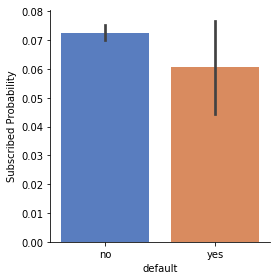

In [23]:
g = sns.catplot(x="default",y="y", data=df, kind="bar", height = 4 ,palette = "muted")
g = g.set_ylabels("Subscribed Probability")

##### Housing vs y:

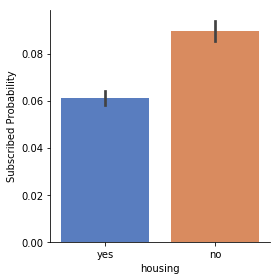

In [24]:
g = sns.catplot(x="housing",y="y", data=df, kind="bar", height = 4 ,palette = "muted")
g = g.set_ylabels("Subscribed Probability")

##### Loan vs y:

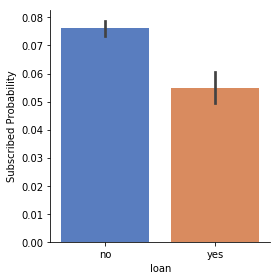

In [25]:
g = sns.catplot(x="loan",y="y", data=df, kind="bar", height = 4 ,palette = "muted")
g = g.set_ylabels("Subscribed Probability")

It seems that being default and having both housing and personal loan cause decreasing percentage of the subscription to a term deposit.

##### Contact vs y:

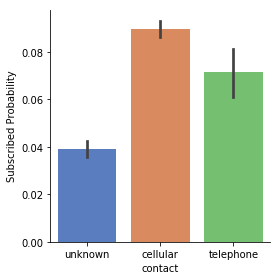

In [26]:
g = sns.catplot(x="contact",y="y", data=df, kind="bar", height = 4 ,palette = "muted")
g = g.set_ylabels("Subscribed Probability")

##### Month vs y:

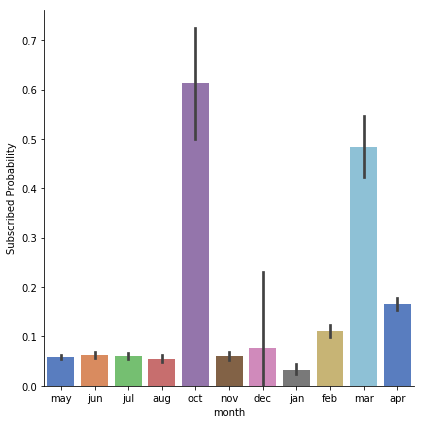

In [27]:
g = sns.catplot(x="month",y="y", data=df, kind="bar", height = 6 ,palette = "muted")
g = g.set_ylabels("Subscribed Probability")

It seems that subscribing number is increasing in October and March, but there is no we significant difference between in the other months. 

On the other hand, we do not have yearly data that's why  we cannot be sure effects of these two months. In my opinion, it can be coincidence.

#### Outlier Detection

In [28]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, Balance, Duration
Outliers_to_drop = detect_outliers(df,2,["age","balance","duration"])

We applied Tukey Method to remove outliers from dataset. Let's remove them!

In [29]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

### Feature Engineering

We noted that housing, loan, default and contact features seems important to prediction. 

Let's convert these features from long format to wide format

In [30]:
#Convert from long format to wide format
df = pd.get_dummies(df, columns = ["housing"])
df = pd.get_dummies(df, columns = ["loan"])
df = pd.get_dummies(df, columns = ["default"])
df = pd.get_dummies(df, columns = ["contact"])
df = pd.get_dummies(df, columns = ["job"])
df = pd.get_dummies(df, columns = ["marital"])
df = pd.get_dummies(df, columns = ["education"])
df = pd.get_dummies(df, columns = ["month"])

In [31]:
df.head()

,age,balance,day,duration,campaign,y,housing_no,housing_yes,loan_no,loan_yes,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,261,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,44,29,5,151,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,76,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,5,92,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,5,198,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Modeling

In [32]:
df['y'].value_counts()

0    37103
1     2896
Name: y, dtype: int64

###### Data Split

In [33]:
y = df["y"]
X = df.drop(labels = ["y"], axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1992)

###### Oversampling

It seems that there is no balance between subscribed and not subscribed customers in the dataset.

Let's apply SMOTE oversampling method to avoid overfitting.

In [35]:
smote = SMOTE(random_state=1992, k_neighbors=5, sampling_strategy=1)
X_train_smo, y_train_smo = smote.fit_sample(X_train, y_train)

In [36]:
a = np.bincount(y_train_smo)
ii = np.nonzero(a)[0]
print(ii, a[ii])

[0 1] [29676 29676]


Right now, there are same size subscribed and not subscribed subpopulations in the training data.

###### Cross Validation

Let's apply 5-fold cross validation.

In [37]:
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)

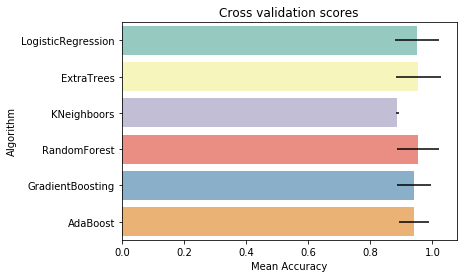

In [38]:
# Modeling step Test differents algorithms 
random_state = 42
classifiers = []

classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_smo, y = y_train_smo, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","ExtraTrees","KNeighboors","RandomForest",
"GradientBoosting","AdaBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

###### Hyperparameter Tunning

Let's perform a grid search optimization for Logistic Regression, Extra Trees, Random Forest, Gradient Boosting and AdaBoost      classifiers.

In [39]:
# LogisticRegression

LR = LogisticRegression()

param_grid = {
                  "C":np.logspace(-3,3,7), 
                  "penalty":["l1","l2"]
}

gs_LR = GridSearchCV(LR, param_grid = param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gs_LR.fit(X_train_smo,y_train_smo)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.8s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:  1.5min finished
C:\Users\azsad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [40]:
y_pred = gs_LR.predict(X_test)

In [41]:
print("\nAccuracy Score:\n")
print(accuracy_score(y_test,y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Accuracy Score:

0.933625

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7427
           1       0.56      0.35      0.43       573

   micro avg       0.93      0.93      0.93      8000
   macro avg       0.75      0.66      0.70      8000
weighted avg       0.92      0.93      0.93      8000


Confusion Matrix:
[[7268  159]
 [ 372  201]]


In [42]:
# ExtraTreesClassifier

ExtC = ExtraTreesClassifier()

param_grid = {
              "max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[80, 120, 250],
              "criterion": ["gini"]
}


gs_ExtC = GridSearchCV(ExtC,param_grid = param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gs_ExtC.fit(X_train_smo, y_train_smo)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed: 15.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [None], 'max_features': [1, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [False], 'n_estimators': [80, 120, 250], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [43]:
y_pred = gs_ExtC.predict(X_test)

In [44]:
print("\nAccuracy Score:\n")
print(accuracy_score(y_test,y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Accuracy Score:

0.933125

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7427
           1       0.60      0.20      0.30       573

   micro avg       0.93      0.93      0.93      8000
   macro avg       0.77      0.60      0.63      8000
weighted avg       0.92      0.93      0.92      8000


Confusion Matrix:
[[7350   77]
 [ 458  115]]


In [45]:
# RandomForest 

RFC = RandomForestClassifier()


param_grid = {
              "max_depth": [4,5,7],
              "max_features": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[80,100,120],
              "criterion": ["gini"]
}


gs_RFC = GridSearchCV(RFC,param_grid = param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gs_RFC.fit(X_train_smo,y_train_smo)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   53.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 405 out of 405 | elapsed: 17.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [4, 5, 7], 'max_features': [1, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [False], 'n_estimators': [80, 100, 120], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [46]:
y_pred = gs_RFC.predict(X_test)

In [47]:
print("\nAccuracy Score:\n")
print(accuracy_score(y_test,y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Accuracy Score:

0.922875

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7427
           1       0.42      0.20      0.27       573

   micro avg       0.92      0.92      0.92      8000
   macro avg       0.68      0.59      0.61      8000
weighted avg       0.90      0.92      0.91      8000


Confusion Matrix:
[[7271  156]
 [ 461  112]]


In [48]:
# GradientBoosting

GBC = GradientBoostingClassifier()

param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [80, 100, 120],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4,5,8],
             # 'min_samples_leaf': [100, 150],
              'max_features': [0.1, 0.3]
              }

gs_GBC = GridSearchCV(GBC, param_grid=param_grid, cv=kfold, scoring="f1", n_jobs=4, verbose = 1)

gs_GBC.fit(X_train_smo ,y_train_smo)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 23.6min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 32.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'loss': ['deviance'], 'n_estimators': [80, 100, 120], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [4, 5, 8], 'max_features': [0.1, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [49]:
y_pred = gs_GBC.predict(X_test)

In [50]:
print("\nAccuracy Score:\n")
print(accuracy_score(y_test,y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Accuracy Score:

0.935625

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7427
           1       0.56      0.51      0.53       573

   micro avg       0.94      0.94      0.94      8000
   macro avg       0.76      0.74      0.75      8000
weighted avg       0.93      0.94      0.93      8000


Confusion Matrix:
[[7195  232]
 [ 283  290]]


In [51]:
# AdaBoost

DTC = DecisionTreeClassifier()

Ada = AdaBoostClassifier(DTC, random_state=1992)

param_grid = {
              "base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.01, 0.1, 0.3]
}

gs_Ada = GridSearchCV(Ada, param_grid=param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gs_Ada.fit(X_train_smo,y_train_smo)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   38.9s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   46.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=1992),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1, 2], 'learning_rate': [0.01, 0.1, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [52]:
y_pred = gs_Ada.predict(X_test)

In [53]:
print("\nAccuracy Score:\n")
print(accuracy_score(y_test,y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Accuracy Score:

0.915125

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7427
           1       0.42      0.47      0.44       573

   micro avg       0.92      0.92      0.92      8000
   macro avg       0.69      0.71      0.70      8000
weighted avg       0.92      0.92      0.92      8000


Confusion Matrix:
[[7051  376]
 [ 303  270]]


Let's check learning curves to see the overfitting effect on the training set and the effect of the training size on the accuracy.

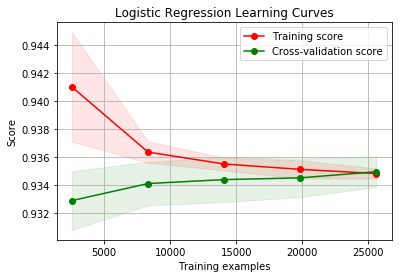

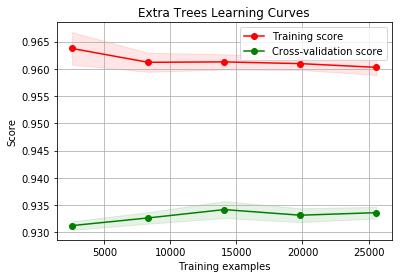

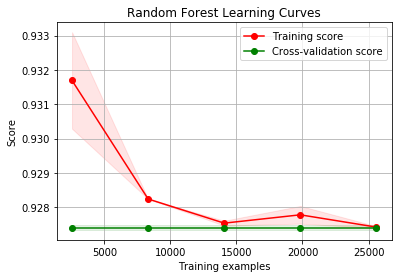

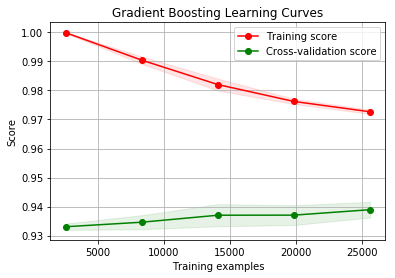

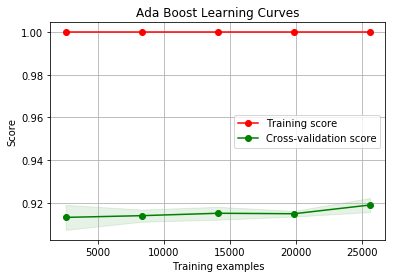

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gs_LR.best_estimator_,"Logistic Regression Learning Curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gs_ExtC.best_estimator_,"Extra Trees Learning Curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gs_RFC.best_estimator_,"Random Forest Learning Curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gs_GBC.best_estimator_,"Gradient Boosting Learning Curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gs_Ada.best_estimator_,"Ada Boost Learning Curves",X_train,y_train,cv=kfold)

It seems that ExtraTrees and Adaboost classifiers tend to overfit the training set.

The training and cross-validation curves are close together that's why GradientBoosting, RandomForest, and LogisticRegression classifiers seem to better generalize the prediction since.

###### Feature Importance of Tree Based Classifiers

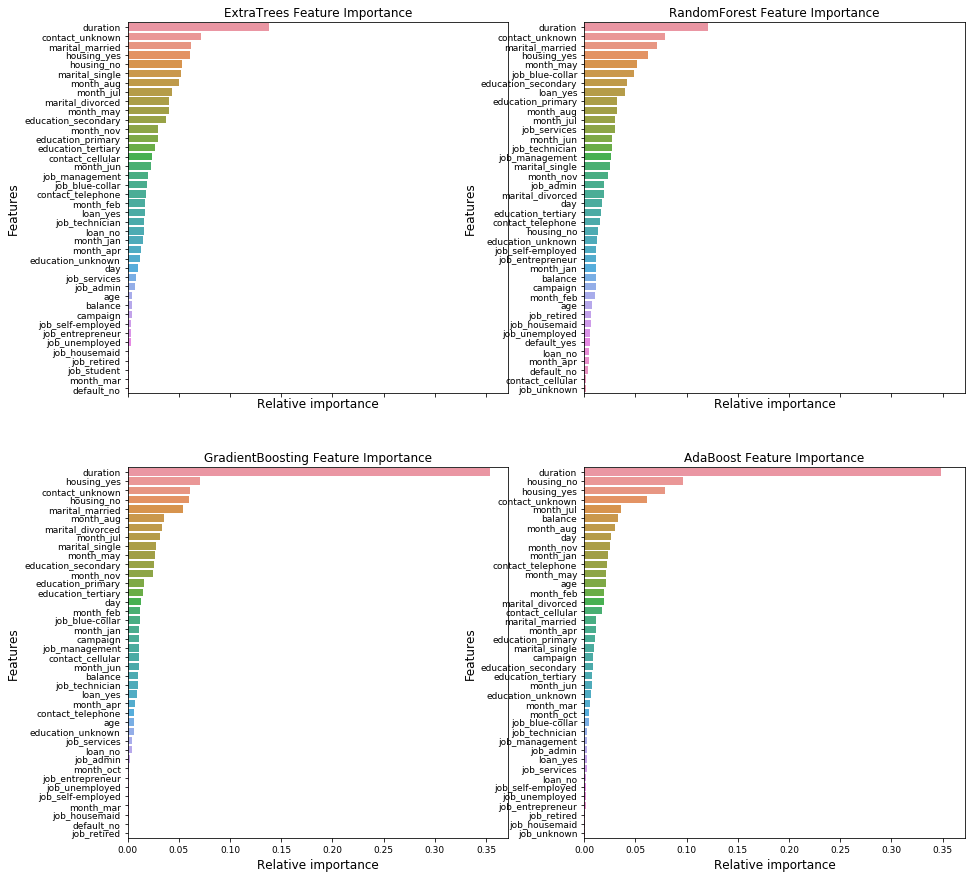

In [55]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("ExtraTrees",gs_ExtC.best_estimator_),("RandomForest",gs_RFC.best_estimator_),("GradientBoosting",gs_GBC.best_estimator_), ("AdaBoost",gs_Ada.best_estimator_)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " Feature Importance")
        nclassifier += 1

It seems that the four classifiers have different top features according to the relative importance.

Nevertheless, they have some common important features for the classification, such as Duration, Marital and Housing.

###### Ensemble Modeling

Let's look into a voting classifier to combine the predictions coming from the 4 classifiers.

In [56]:
voting_clas = VotingClassifier(estimators=[('rfc', gs_RFC.best_estimator_),('extc', gs_ExtC.best_estimator_),('ada',gs_Ada.best_estimator_),('gbc',gs_GBC.best_estimator_)], voting='soft', n_jobs=4)

voting_clas = voting_clas.fit(X_train_smo, y_train_smo)

In [57]:
y_pred = voting_clas.predict(X_test)

In [58]:
print("\nAccuracy Score:\n")
print(accuracy_score(y_test,y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Accuracy Score:

0.934625

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7427
           1       0.57      0.38      0.45       573

   micro avg       0.93      0.93      0.93      8000
   macro avg       0.76      0.68      0.71      8000
weighted avg       0.93      0.93      0.93      8000


Confusion Matrix:
[[7261  166]
 [ 357  216]]


**Result: I will prefer Gradient Boosting algorithm for training the model. When we look for accuracy scores for each report all of them over 91%. However, we are working with imbalanced data and that's why i I will also consider  f1 score, precision and recall scores.**

### **Can we make a segmentation of customers to prioritize the clients?** 

In [59]:
df_clust = pd.read_csv("C:/Users/azsad/OneDrive/Masaüstü/HangiKredi/term-deposit-marketing-2020.csv",sep=",",low_memory=False,encoding='utf-8')

In [60]:
df_clust["y"].replace(to_replace="yes", value=1, inplace=True)
df_clust["y"].replace(to_replace="no", value=0, inplace=True)

In [61]:
df_clust.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


In [62]:
# Drop outliers
df_clust = df_clust.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [63]:
nums = {"age", "balance", "day", "duration"} #,"housing_no","housing_yes","loan_no","loan_yes","default_no","default_yes"}  

df_clust[nums].head()

,age,day,balance,duration
0,58,5,2143,261
1,44,5,29,151
2,33,5,2,76
3,47,5,1506,92
4,33,5,1,198


Before segment the customers, let’s pull out some statistics related to the data:

In [64]:
df_clust[nums].describe()

,age,day,balance,duration
count,39999.000000,39999.000000,39999.000000,39999.000000
mean,40.543764,16.017200,1274.196530,254.801645
std,9.640445,8.278229,2903.760801,259.330160
min,19.000000,1.000000,-8019.000000,0.000000
25%,33.000000,8.000000,54.000000,100.000000
50%,39.000000,17.000000,407.000000,175.000000
75%,48.000000,21.000000,1319.000000,313.000000
max,95.000000,31.000000,102127.000000,4918.000000


Here, we can observe that there is a lot of variation in the magnitude of the data. Variables like Day and Age have low magnitude whereas variables like Balance, Duration have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can make a problem. So let’s first bring all the variables to the same magnitude.

In [65]:
# Standardizing the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clust[nums])

C:\Users\azsad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\azsad\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [66]:
# Statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,3.999900e+04,3.999900e+04,3.999900e+04,3.999900e+04
mean,-8.137833e-16,7.621539e-16,2.654872e-16,1.521932e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-2.234755e+00,-1.814082e+00,-3.200440e+00,-9.825499e-01
25%,-7.825218e-01,-9.684801e-01,-4.202177e-01,-5.969363e-01
50%,-1.601361e-01,1.187225e-01,-2.986497e-01,-3.077260e-01
75%,7.734425e-01,6.019236e-01,1.542966e-02,2.244208e-01
max,5.648797e+00,1.809927e+00,3.473222e+01,1.798193e+01


##### Determining the number of cluster

In [67]:
def plot_BIC(data_scaled,K):
    from sklearn import mixture
    BIC=[]
    for k in K:
        model=mixture.GaussianMixture(n_components=k,init_params='kmeans')
        model.fit(data_scaled)
        BIC.append(model.bic(data_scaled))
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(K,BIC,'-cx')
    plt.ylabel("BIC score")
    plt.xlabel("k")
    plt.title("BIC scoring for K-means cell's behaviour")
    return(BIC)

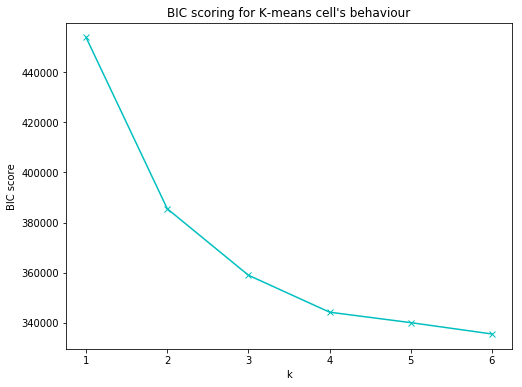

In [69]:
K = range(1,7)
BIC = plot_BIC(data_scaled,K)

By Bayessian Information Criterion (BIC), we decided to segmentate the customers to be 4 or 5 segments.

##### Clustering

Now let’s create a kmeans function and fit it on the data.

In [70]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

cluster = KMeans(n_clusters=4,random_state=217)

df_clust['cluster'] = cluster.fit_predict(df_clust[nums])

In [71]:
df_clust['cluster'].value_counts()

0    34629
3     4694
1      635
2       41
Name: cluster, dtype: int64

In [72]:
df_clust.groupby(['cluster'])['y'].mean()

cluster
0    0.068151
1    0.091339
2    0.097561
3    0.100980
Name: y, dtype: float64

In [73]:
df_clust[df_clust['cluster'] == 3].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,cluster
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,0,3
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,0,3
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,0,3
187,54,management,married,secondary,no,4080,no,no,unknown,5,may,140,1,0,3
205,50,services,married,secondary,no,5699,yes,no,unknown,5,may,381,2,0,3


In [74]:
#Label Encoding
df_clust["housing"] = LabelEncoder().fit(df_clust["housing"])
df_clust["loan"] = LabelEncoder().fit(df_clust["loan"])
df_clust["default"] = LabelEncoder().fit(df_clust["default"])
df_clust["contact"] = LabelEncoder().fit(df_clust["contact"])
df_clust["job"] = LabelEncoder().fit(df_clust["job"])
df_clust["marital"] = LabelEncoder().fit(df_clust["marital"])
df_clust["education"] = LabelEncoder().fit(df_clust["education"])
df_clust["month"] = LabelEncoder().fit(df_clust["month"])

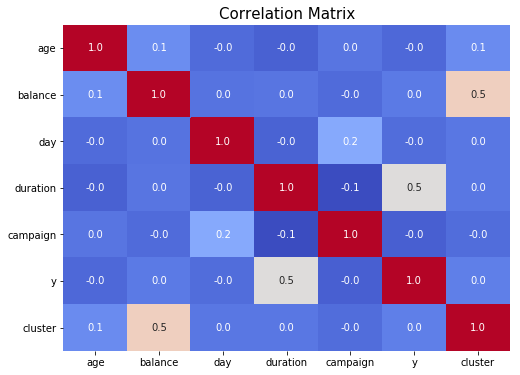

In [75]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [8,6])
g = sns.heatmap(df_clust.corr(),cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False)
ax.set_title("Correlation Matrix", fontsize=15)
plt.show()

It seems that there is a correlation between clusters and balance features.

Let's check their balance distribution.

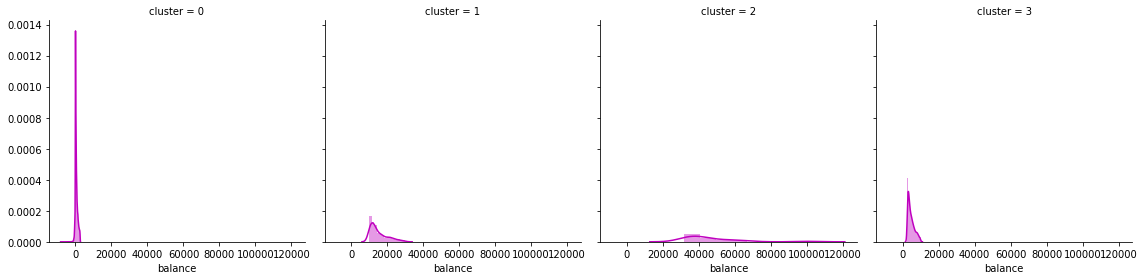

In [76]:
g = sns.FacetGrid(df_clust, col='cluster', height=4)
g = g.map(sns.distplot, "balance", color="m")

##### **Results**

We can segment customers according to k-means results as above and it can be prioritized the clients while doing direct marketing by this segmentation.

Direct marketing has an important role to sell banking products. When we look for contacts sales distribution, we can note that cellular contact and telephone has bigger roles on sale rates.

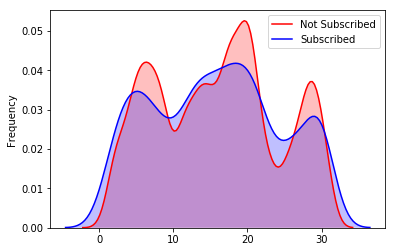

In [77]:
g = sns.kdeplot(df["day"][(df["y"] == 0) & (df["day"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["day"][(df["y"] == 1) & (df["day"].notnull())], ax =g, color="Blue", shade= True)
#g.set_xlabel("Last Contact Duration")
g.set_ylabel("Frequency")
g = g.legend(["Not Subscribed","Subscribed"])

There are somes peak corresponding to the particular day ranges in a month. These days can be receiving salary days for customers.

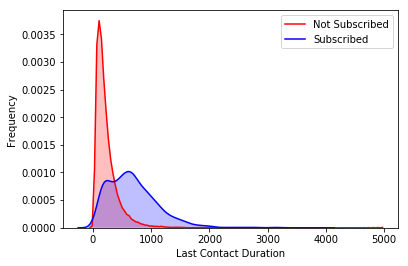

In [78]:
g = sns.kdeplot(df["duration"][(df["y"] == 0) & (df["duration"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["duration"][(df["y"] == 1) & (df["duration"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Last Contact Duration")
g.set_ylabel("Frequency")
g = g.legend(["Not Subscribed","Subscribed"])

It seems that contact duration is also important to sale. Both short and long durations show negative effect that's why we can keep contact duration between 300 and 800 seconds.

Also, it is obvious that having a housing loan, personal loan or being default reduces of the clients the likelihood of getting term deposits.